# Postavitev preprostega agentnega modela: 3. Del

In [1]:
vrednost_izbire = [-1.,1.] #začetna vrednost izbire
osebnosti = ['trmast','prilagodljiv']

In [54]:
def ustvari_agenta(vrednost_izbire, osebnosti):
    return [vrednost_izbire, osebnosti]

Agentom bomo prilagodili vrednost izbire tako, da ji bomo dodali naključno vrednost normalne porazdelitve. Za center normalne porazdelitve bomo uporabili začetno vrednost izibre agenta. 

In [55]:
from copy import deepcopy 
from numpy.random import normal
import numpy

def vrsta_distribucije(agent):
    distribucija_agenta = normal(agent[0],0.25) #dodamo gaussovo porazdelitev s centrom standardnim odklonom 0,25
    return distribucija_agenta

#preizkusimo če deluje
testni_agent1 = [-1,'trmast']
testni_agent2 = [1,'prilagodljiv']
testni_agent1[0] = vrsta_distribucije(testni_agent1)
testni_agent2[0] = vrsta_distribucije(testni_agent2)
print(testni_agent1)
print(testni_agent2)

[-0.6588307353880806, 'trmast']
[0.7949531766790183, 'prilagodljiv']


V naslednjem koraku bomo v model dodali logiko odločanja, oziroma funkcijo, s katero bo agent pridobival znanje od drugih agentov. Agent se bo znanju prilagajal glede na njegovo osebnost. 
1. Prilagodljivi agenti se bodo agentu s katerim komunicirajo približali za polovico razdalje med njunima vrednostima izbire.
2. Trmast agent ne bo popolnoma trmast ampak se bo prav tako rahlo prilagajal. Njegova vrednost izbire se bo za eno desetino razdalje približala agentu s katerim komunicira.

In [123]:
import random

def pridobiti_znanje(distribucija,agent):
    if random.random() <= 0.2:
        nova_izbira = 0
        if agent[1] == "prilagodljiv": #pogoj če je agent prilagodljiv
            nova_izbira = (agent[0] + distribucija) / 2.
        else: #pogoj ki se izvede ko je agent trmast
            razlika = abs(distribucija-agent[0])
            if distribucija > agent[0]:
                nova_izbira = agent[0] + (razlika/10.)
            else:
                novo_izbira = agent[0] - (razlika/10.)
        agent[0] = deepcopy(nova_izbira)

Logiko še testiramo, da vidimo če deluje pravilno:

In [124]:
trmast_agent = [-1,'trmast']
prilagodljiv_agent = [-1,'prilagodljiv']

pridobiti_znanje(1, trmast_agent)
pridobiti_znanje(1, prilagodljiv_agent)

print("Prilagodljiv agent", prilagodljiv_agent)
print("Trmast agent", trmast_agent)

Prilagodljiv agent [-1, 'prilagodljiv']
Trmast agent [-1, 'trmast']


Z naslednjo funkcijo bomo opisali komunikacijo med dvema agentoma. Funkcija naprej pokliče funkcijo, ki agentu določi vrednost iz distribucijo, nato pa fukncijo za pridobivanje znanja, ki agentoma prilagodi vrednost izbire. 

In [125]:
def pogovor(agent1,agent2):
    #najprej pridobimo vrednosti distribuceja za vsakega agenta
    agent1_distribucija = vrsta_distribucije(agent1)
    agent2_distribucija = vrsta_distribucije(agent2)
    #med agentoma prenesemo znanje
    pridobiti_znanje(agent2_distribucija,agent1)
    pridobiti_znanje(agent1_distribucija,agent2)
    
    return agent1_distribucija, agent2_distribucija, agent1, agent2

Če testiramo našo komunikacijo na prejšnih dveh agentih lahko opazujemo kako se jima spremeni vrednost izbire. 

In [126]:
pogovor(trmast_agent,prilagodljiv_agent)
print("Prilagodljiv agent", prilagodljiv_agent)
print("Trmast agent", trmast_agent)

Prilagodljiv agent [-1, 'prilagodljiv']
Trmast agent [-1, 'trmast']


### Simulacija 

In [127]:
import random

def ustvari_populacijo(st_agentov):
    
    populacija = []
    
    for i in range(st_agentov):
        
        m = random.randint(0,1)
        
        p = random.randint(0,1)
        
        agent = ustvari_agenta(vrednost_izbire[m], osebnosti[p])
        #agenta dodamo v seznam populacija
        populacija.append(agent)

    return populacija

In [128]:
ustvari_populacijo(10)

[[1.0, 'prilagodljiv'],
 [-1.0, 'trmast'],
 [1.0, 'trmast'],
 [1.0, 'prilagodljiv'],
 [-1.0, 'trmast'],
 [1.0, 'trmast'],
 [1.0, 'trmast'],
 [1.0, 'prilagodljiv'],
 [-1.0, 'prilagodljiv'],
 [1.0, 'prilagodljiv']]

In [129]:
from numpy.random import choice

def izberi_par(populacija):
    i = random.randint(0, len(populacija) - 1) 
    j = random.randint(0, len(populacija) - 1)
    
    while i == j:
        j = random.randint(0, len(populacija) - 1)
        
    return populacija[i], populacija[j]

def simulacija(stevilo_agentov, stevilo_simulacij):
    
    zacetna_populacija = ustvari_populacijo(stevilo_agentov)
    populacija=deepcopy(zacetna_populacija)
    
    for i in range(stevilo_simulacij):
        
        par_agentov = izberi_par(populacija)
        #print(par_agentov[0],par_agentov[1])
        pogovor(par_agentov[0],par_agentov[1])
    
    return zacetna_populacija, populacija

In [130]:
populacija_zacetek, populacija_konec = simulacija(50,200)

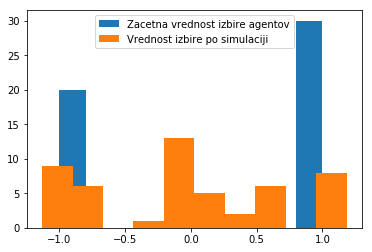

In [131]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns 

zacetna_izbira = []
koncna_izbira = []

for agent in range(len(populacija_zacetek)):
    zacetna_izbira.append(populacija_zacetek[agent][0])
    koncna_izbira.append(populacija_konec[agent][0])
    
plt.hist(zacetna_izbira, label='Zacetna vrednost izbire agentov')
plt.hist(koncna_izbira, label='Vrednost izbire po simulaciji')
plt.legend(loc='upper center')
plt.show()